In [1]:
pip install python-louvain


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import powerlaw

import pandas as pd
import plotly.express as px
import community as community_louvain

import infomap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import LeaveOneOut


In [3]:
df_airport = pd.read_csv('airports.dat', header=None)
df_routes = pd.read_csv('routes.dat', header=None)

In [4]:
print('shape of airport.dat', df_airport.shape)
print('shape of routes.dat',df_routes.shape)

shape of airport.dat (7698, 14)
shape of routes.dat (67663, 9)


<div class="alert alert-success"> Here no NaN values were dropped because NaN values does not affect the outcome 

In [5]:
df_airport_no_na = df_airport
df_routes_no_na = df_routes

In [6]:
print('shape of airport.dat after dropping NaN',df_airport_no_na.shape)
print('shape of routes.dat after dropping NaN', df_routes_no_na.shape)

shape of airport.dat after dropping NaN (7698, 14)
shape of routes.dat after dropping NaN (67663, 9)


<div class="alert alert-success"> Drop uneccessary column

In [7]:
df_airport_final = df_airport_no_na.drop(df_airport_no_na.columns[0], axis=1)

In [8]:
df_airport_final.columns = [
    'Name of Airport',
    'City', 
    'Country', 
    'IATA', 
    'ICAO', 
    'Latitude', 
    'Longitude', 
    'Altitude', 
    'Timezone Offset', 
    'DST', 
    'Timezone',
    'Type', 
    'Sourced from']

In [9]:
df_routes_no_na.columns = [
    'Airline Code',
    'Airline ID',
    'Source Airport Code',
    'Source Airport ID',
    'Destination Airport Code',
    'Destination Airport ID',
    'Codeshare',
    'Stops',
    'Equipment']


df_routes_final = df_routes_no_na

In [10]:
df_airport_final

,Name of Airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone Offset,DST,Timezone,Type,Sourced from
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [11]:
df_routes_final

,Airline Code,Airline ID,Source Airport Code,Source Airport ID,Destination Airport Code,Destination Airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [12]:
all_stops_1 = (df_routes_final['Stops'] == 0).all()

# Print the result
print("Are all stops equal to 0?", all_stops_1)

Are all stops equal to 0? False


<div class="alert alert-success"> Therefore, they are all direct flights



# Create a scatter plot of airport locations using Plotly
fig = px.scatter_geo(df_airport_final, lat='Latitude', lon='Longitude', hover_name='Name of Airport', projection='natural earth')
fig.update_geos(showcountries=True, countrycolor='gray')
fig.update_layout(title='Airport Locations')
fig.show()


In [13]:
G = nx.DiGraph()
len(G)

0

Calculating best minimal value for power law fit


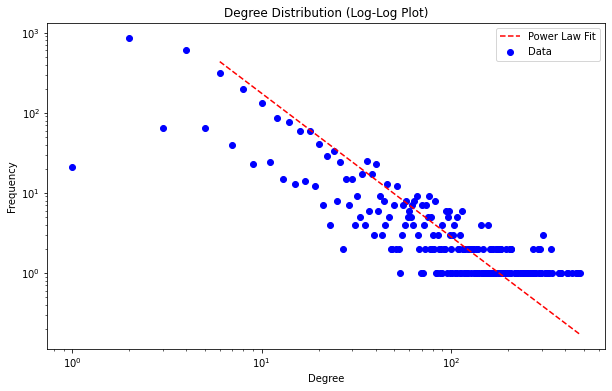

Giant component size: 3397
Largest Strongly Connected Component Size (LSCC): 3354
Largest Weakly Connected Component Size (LWCC): 3397
Clustering Coefficient: 0.2675264186015681, Transitivity: 0.24830297528765316


In [15]:
G = nx.DiGraph()

# Add airports as nodes
for index, row in df_airport_final.iterrows():
    if pd.notnull(row['IATA']):  # Only add airports with a valid IATA code
        G.add_node(row['IATA'], **row.to_dict())

# Add routes as edges
for index, row in df_routes_final.iterrows():
    if pd.notnull(row['Source Airport Code']) and pd.notnull(row['Destination Airport Code']):
        G.add_edge(row['Source Airport Code'], row['Destination Airport Code'])




# Degree Distribution
degree_sequence = sorted([d for n, d in G.degree() if d>0], reverse=True)

# Fit the power-law model to the degree_sequence
fit = powerlaw.Fit(np.array(degree_sequence), discrete=True, xmin=0)
gamma = fit.power_law.alpha
x_min = fit.power_law.xmin
R, p = fit.distribution_compare('power_law', 'exponential')

# Calculate theoretical frequencies based on the fitted model
degree_values = np.arange(x_min, max(degree_sequence)+1)
theoretical_frequencies = powerlaw.Power_Law(xmin=x_min, parameters=[gamma]).pdf(degree_values)

# Actual degree frequencies
unique_degrees, actual_counts = np.unique(degree_sequence, return_counts=True)

# Plotting Degree Distribution (Scatter Plot) with Power Law Fit
plt.figure(figsize=(10, 6))
plt.scatter(unique_degrees, actual_counts, color='blue', label='Data')
plt.plot(degree_values, theoretical_frequencies * len(degree_sequence) / sum(theoretical_frequencies), color='red', linestyle='--', label='Power Law Fit')
plt.title("Degree Distribution (Log-Log Plot)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()



# Find the largest connected component (undirected, giant component)
largest_cc = max(nx.connected_components(G.to_undirected()), key=len)
giant_component_size = len(largest_cc)
print(f"Giant component size: {giant_component_size}")



# Find the largest strongly connected component (directed,giant component)
largest_scc = max(nx.strongly_connected_components(G), key=len)
giant_component_size_scc = len(largest_scc)
print(f"Largest Strongly Connected Component Size (LSCC): {giant_component_size_scc}")



# Largest Weakly Connected Component (directed,giant component)
largest_wcc = max(nx.weakly_connected_components(G), key=len)  # Nodes in LWCC
giant_component_size_wcc = len(largest_wcc)  # Size of LWCC
print(f"Largest Weakly Connected Component Size (LWCC): {giant_component_size_wcc}")



# Clustering Coefficient, Transitivity (for undirected version of G)
clustering_coefficient = nx.average_clustering(G.to_undirected())
transitivity = nx.transitivity(G.to_undirected())
print(f"Clustering Coefficient: {clustering_coefficient}, Transitivity: {transitivity}")


# Centrality Measures 

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)  ##computes the betweenness centrality using a random sample of k nodes since G is too large
pagerank = nx.pagerank(G)


In [16]:
max_node1, max_degree_centrality = max(degree_centrality.items(), key=lambda x: x[1])
print('The max node with max degree centrality is:',max_node1, max_degree_centrality)


max_node2, max_closeness_centrality = max(closeness_centrality.items(), key=lambda x: x[1])
print('The max node with max closeness centrality is:',max_node2, max_closeness_centrality)



max_node3, max_betweenness_centrality = max(betweenness_centrality.items(), key=lambda x: x[1])
print('The max node with max betweeness centrality is:',max_node3, max_betweenness_centrality)


max_node4, max_pagerank = max(pagerank.items(), key=lambda x: x[1])
print('The max node with max pagerank is:',max_node4, max_pagerank)


The max node with max degree centrality is: FRA 0.07650360866078589
The max node with max closeness centrality is: FRA 0.2154836549228251
The max node with max betweeness centrality is: ANC 0.02116883434702232
The max node with max pagerank is: ATL 0.004136813222011574


In [17]:
df_degree_centrality = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality']).sort_values(by='Degree Centrality', ascending=False)
df_closeness_centrality = pd.DataFrame(list(closeness_centrality.items()), columns=['Node', 'Closeness Centrality']).sort_values(by='Closeness Centrality', ascending=False)
df_betweenness_centrality = pd.DataFrame(list(betweenness_centrality.items()), columns=['Node', 'Betweenness Centrality']).sort_values(by='Betweenness Centrality', ascending=False)
df_pagerank = pd.DataFrame(list(pagerank.items()), columns=['Node', 'PageRank']).sort_values(by='PageRank', ascending=False)

# Display the first 50 records of each centrality measure
#print("Top 50 Degree Centralities:")
#print(df_degree_centrality.head(50))

#print("\nTop 50 Closeness Centralities:")
#print(df_closeness_centrality.head(50))

#print("\nTop 50 Betweenness Centralities:")
#print(df_betweenness_centrality.head(50))

#print("\nTop 50 PageRank Scores:")
#print(df_pagerank.head(50))

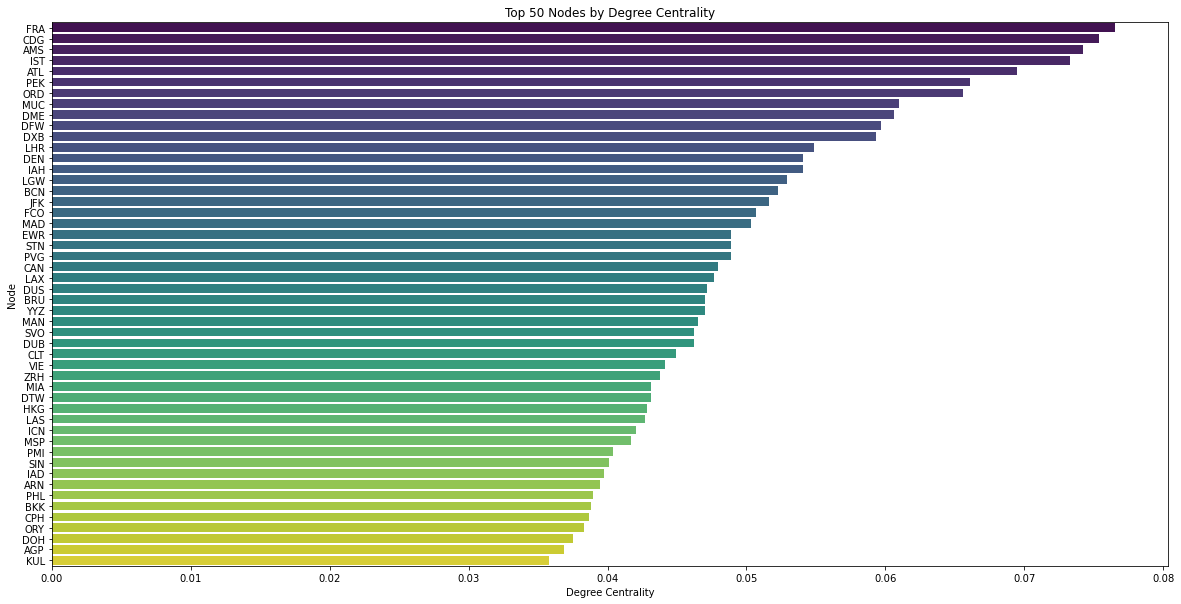

In [18]:
# Degree Centrality Bar Chart
top_50_degree = df_degree_centrality.head(50)
plt.figure(figsize=(20, 10))
sns.barplot(x='Degree Centrality', y='Node', data=top_50_degree, palette='viridis')
plt.title('Top 50 Nodes by Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Node')
plt.show()


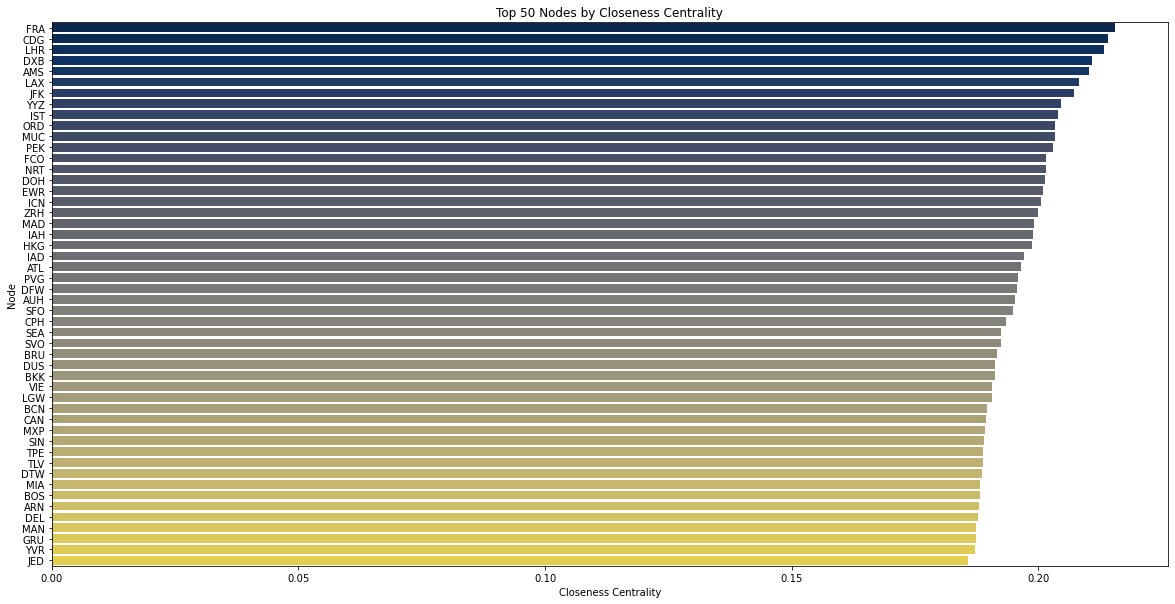

In [19]:
# Closeness Centrality Bar Chart
top_50_closeness = df_closeness_centrality.head(50)
plt.figure(figsize=(20, 10))
sns.barplot(x='Closeness Centrality', y='Node', data=top_50_closeness, palette='cividis')
plt.title('Top 50 Nodes by Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Node')
plt.show()


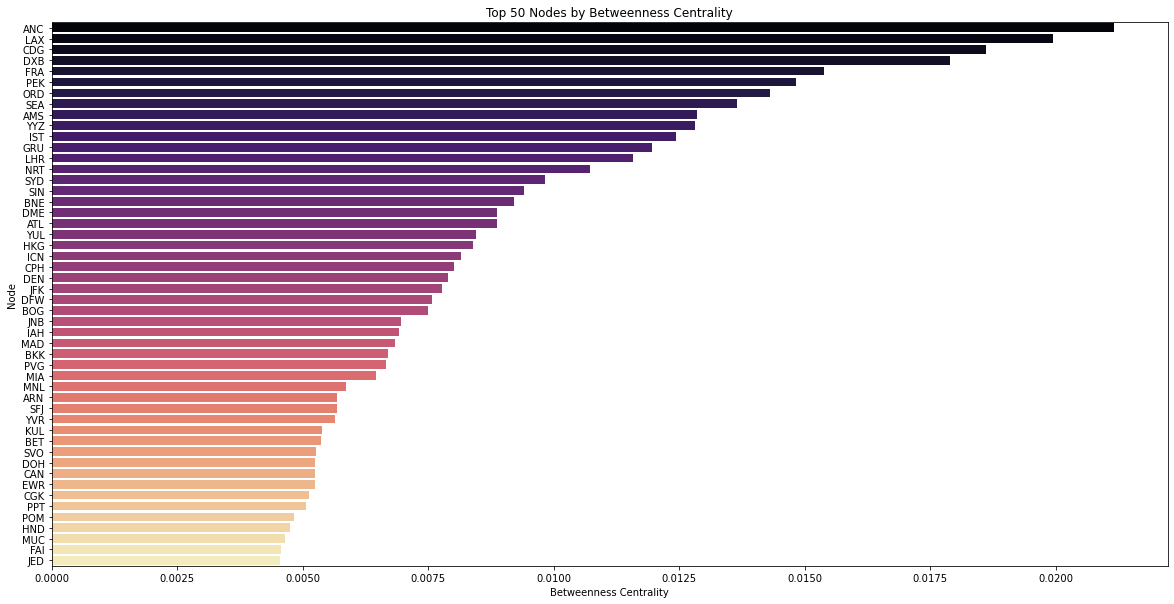

In [20]:
# Betweenness Centrality Bar Chart
top_50_betweenness = df_betweenness_centrality.head(50)
plt.figure(figsize=(20, 10))
sns.barplot(x='Betweenness Centrality', y='Node', data=top_50_betweenness, palette='magma')
plt.title('Top 50 Nodes by Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Node')
plt.show()


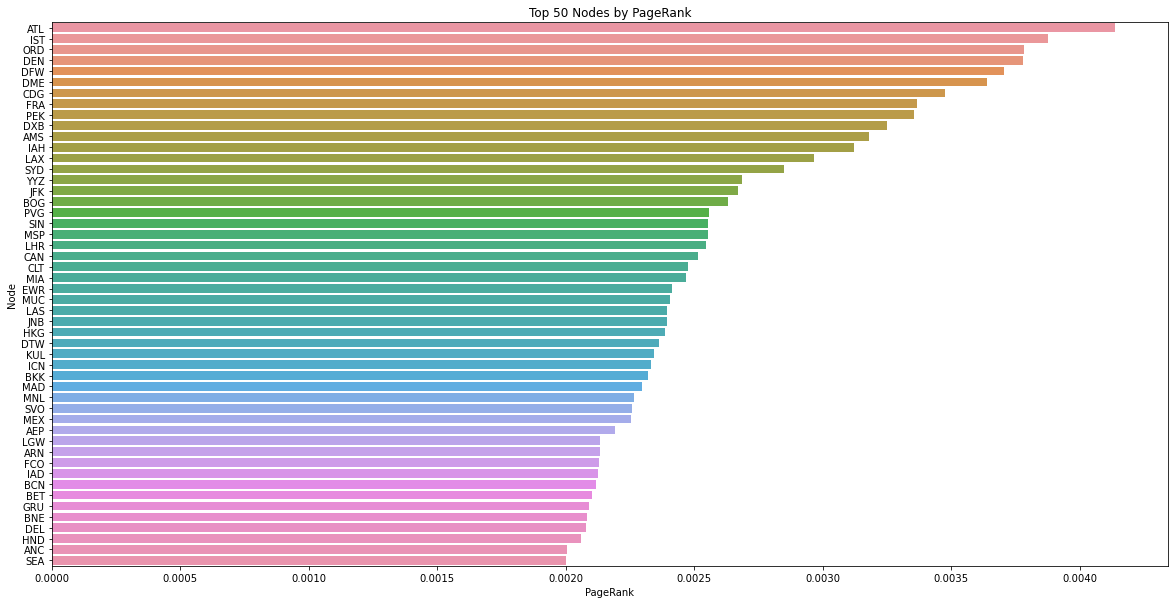

In [21]:
# PageRank Bar Chart
top_50_pagerank = df_pagerank.head(50)
plt.figure(figsize=(20, 10))
sns.barplot(x='PageRank', y='Node', data=top_50_pagerank)
plt.title('Top 50 Nodes by PageRank')
plt.xlabel('PageRank')
plt.ylabel('Node')
plt.show()


In [22]:
# Merging the centrality dataframes on 'Node' column
df_merged = df_degree_centrality.merge(df_closeness_centrality, on='Node', how='inner')
df_merged = df_merged.merge(df_betweenness_centrality, on='Node', how='inner')
df_merged = df_merged.merge(df_pagerank, on='Node', how='inner')


In [23]:
df_centralities_and_page_rank = df_merged

In [24]:
df_centralities_and_page_rank

,Node,Degree Centrality,Closeness Centrality,Betweenness Centrality,PageRank
0,FRA,0.076504,0.215484,0.015378,0.003368
1,CDG,0.075381,0.214168,0.018606,0.003476
2,AMS,0.074258,0.210290,0.012863,0.003181
3,IST,0.073296,0.203941,0.012429,0.003879
4,ATL,0.069447,0.196407,0.008864,0.004137
...,...,...,...,...,...
6231,PKG,0.000000,0.000000,0.000000,0.000039
6232,LBW,0.000000,0.000000,0.000000,0.000039
6233,NNX,0.000000,0.000000,0.000000,0.000039
6234,LPU,0.000000,0.000000,0.000000,0.000039


# Aim: Use 2018 passengers merged with centralities and pagerank for training

## Now merge the dataframes

In [25]:
Pax_2018 = pd.read_csv('List of busiest airports by passenger traffic 2018.csv')
#print(Pax_2018.columns)
columns_to_drop = ['Unnamed: 0', 'Rank', 'Airport', 'Location', 'Country',
                   'Code (IATA/ICAO)', 'IATA', 'Rank change', '% change']


# Standardizing the IATA codes
# Extract the IATA code
Pax_2018['IATA'] = Pax_2018['Code (IATA/ICAO)'].str.split('/').str[0]
df_2018 = df_centralities_and_page_rank.merge(Pax_2018, left_on='Node', right_on='IATA', how='inner')
df_2018.drop(columns = columns_to_drop, axis=1, inplace=True)
df_2018

,Node,Degree Centrality,Closeness Centrality,Betweenness Centrality,PageRank,Total passengers
0,FRA,0.076504,0.215484,0.015378,0.003368,24812849
1,CDG,0.075381,0.214168,0.018606,0.003476,26201698
2,AMS,0.074258,0.210290,0.012863,0.003181,25500000
3,IST,0.073296,0.203941,0.012429,0.003879,36988563
4,ATL,0.069447,0.196407,0.008864,0.004137,75704760
5,PEK,0.066079,0.202965,0.014826,0.003357,32639013
6,ORD,0.065597,0.203395,0.014302,0.003786,54020399
7,DME,0.060626,0.183964,0.008870,0.003640,25065087
8,DFW,0.059663,0.195627,0.007578,0.003707,62465756
9,DXB,0.059342,0.210923,0.017896,0.003250,29110609


## Let's predict Degree Centrality

In [26]:
df_2018_for_model = df_2018.copy()
df_2018_for_model = df_2018_for_model.drop('Node', axis=1) #drop the IATA coloumn

X = df_2018_for_model.drop('Degree Centrality', axis=1)
y = df_2018_for_model['Degree Centrality']

#X


## Use Leave-one-out for validation

In [29]:
# Create LeaveOneOut object
loo = LeaveOneOut()

# To store the predictions and actuals
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Predict on the test data
    prediction = lr_model.predict(X_test)
    
    # Store true and predicted values for later analysis
    y_true.extend(y_test)
    y_pred.extend(prediction)

# Compute the mean squared error or other accuracy metrics
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error from Leave-One-Out CV:", mse)

y_pred_train = lr_model.predict(X)
train_r2 = r2_score(y, y_pred_train)
print(f'R$^{2}$ score is', train_r2)

train_rmse = np.sqrt(mean_squared_error(y, y_pred_train))
print(f'$RMSE$ score is', train_rmse)


Mean Squared Error from Leave-One-Out CV: 5.846759040238883e-05
R$^2$ score is 0.8519498880383857
$RMSE$ score is 0.007033037900184452


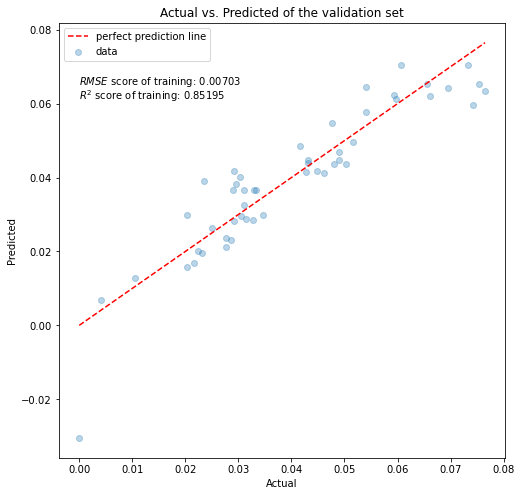

In [30]:
# Plotting actual vs predicted values
plt.figure(figsize=[8,8])
plt.scatter(y_true, y_pred, alpha=0.3, label='data')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='perfect prediction line')  # a red dashed diagonal line
plt.text(min(y_true), max(y_true) * 0.8, f'$R^{2}$ score of training: {round(train_r2, 5)}')  # Adjust text placement
plt.text(min(y_true), max(y_true) * 0.85, f'$RMSE$ score of training: {round(train_rmse, 5)}')  # Adjust text placement

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted of the validation set')
plt.legend()
plt.show()

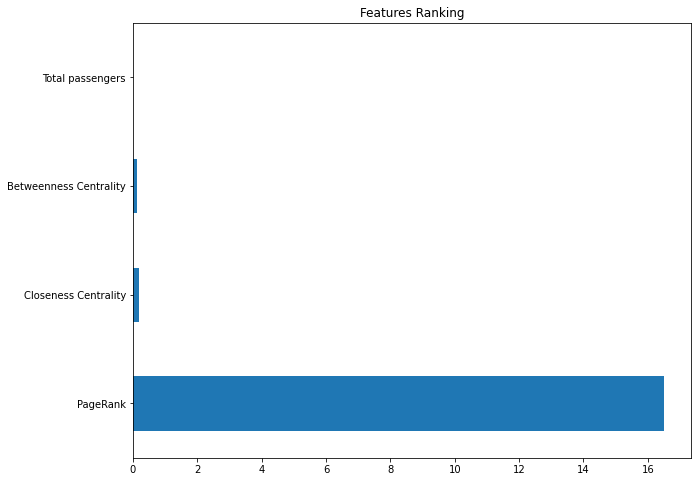

In [31]:
# Get the magnitude of coefficients
feature_importance = pd.DataFrame(lr_model.coef_, index=X.columns, columns=['Coefficient'])
feature_importance['Absolute'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 8))
feature_importance['Absolute'].head(5).plot(kind='barh')
plt.title('Features Ranking')
plt.show()

## Basically not much passengers data was used for learning and prediction on Degree Centrality!!

# Since 2018-2021 have the same data

## Use 2018 to predict 2022 degree centrality (Real Deal)

In [32]:
Pax_2022 = pd.read_csv("List of busiest airports by passenger traffic 2022.csv")

columns_to_drop = ['Unnamed: 0', 'Rank', 'Airport', 'Location', 'Country',
                   'Code (IATA/ICAO)', 'IATA', 'Rank change', '% change']


# Standardizing the IATA codes
# Extract the IATA code
Pax_2022['IATA'] = Pax_2022['Code (IATA/ICAO)'].str.split('/').str[0]
df_2022 = df_centralities_and_page_rank.merge(Pax_2022, left_on='Node', right_on='IATA', how='inner')
df_2022.drop(columns = columns_to_drop, axis=1, inplace=True)


df_2022.rename(columns = {'Total passengers':'Total passengers 2022'}, inplace = True)
df_2022

,Node,Degree Centrality,Closeness Centrality,Betweenness Centrality,PageRank,Total passengers 2022
0,FRA,0.076504,0.215484,0.015378,0.003368,48918482
1,CDG,0.075381,0.214168,0.018606,0.003476,57474033
2,AMS,0.074258,0.210290,0.012863,0.003181,52472188
3,IST,0.073296,0.203941,0.012429,0.003879,64289107
4,ATL,0.069447,0.196407,0.008864,0.004137,93699630
5,ORD,0.065597,0.203395,0.014302,0.003786,68340619
6,MUC,0.060946,0.203327,0.004649,0.002407,31642738
7,DFW,0.059663,0.195627,0.007578,0.003707,73362946
8,DXB,0.059342,0.210923,0.017896,0.003250,66069981
9,LHR,0.054852,0.213241,0.011574,0.002548,61614508


## Now only the same IATA in both 2018 and 2022 are displayed

In [33]:
df_with_same_IATA_2018_2022 = pd.merge(df_2018, df_2022, on='Node', suffixes=('_2018', '_2022'))
#df_merged_2018_2022.columns

df_with_same_IATA_2018_2022.drop(['Degree Centrality_2018', 'Closeness Centrality_2018', 'Betweenness Centrality_2018', 'PageRank_2018',
       'Total passengers'], axis=1, inplace=True)

In [34]:
df_with_same_IATA_2018_2022
#df_with_same_IATA_2018_2022.columns

,Node,Degree Centrality_2022,Closeness Centrality_2022,Betweenness Centrality_2022,PageRank_2022,Total passengers 2022
0,FRA,0.076504,0.215484,0.015378,0.003368,48918482
1,CDG,0.075381,0.214168,0.018606,0.003476,57474033
2,AMS,0.074258,0.210290,0.012863,0.003181,52472188
3,IST,0.073296,0.203941,0.012429,0.003879,64289107
4,ATL,0.069447,0.196407,0.008864,0.004137,93699630
5,ORD,0.065597,0.203395,0.014302,0.003786,68340619
6,DFW,0.059663,0.195627,0.007578,0.003707,73362946
7,DXB,0.059342,0.210923,0.017896,0.003250,66069981
8,DEN,0.054050,0.185480,0.007892,0.003778,69286461
9,IAH,0.054050,0.198870,0.006924,0.003122,40974831


## We focus on the airport that were overlapped, only 33 airports survived for comparison

### Now test the trained model with 2022 unseen data

In [35]:
df_2022_for_testing = df_with_same_IATA_2018_2022.drop('Node', axis=1)


X_test = df_2022_for_testing.drop('Degree Centrality_2022', axis=1)
y_test = df_2022_for_testing['Degree Centrality_2022']


In [36]:
# Make predictions
y_pred_train = lr_model.predict(X)
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print('Root mean square error for training prediction ',train_rmse)
print('Root mean square error for testing prediction ',test_rmse)
print()
print('R2 value of training prediction', train_r2)
print('R2 value of testing prediction', test_r2)

Root mean square error for training prediction  0.007033037900184452
Root mean square error for testing prediction  0.006706357600620736

R2 value of training prediction 0.8519498880383857
R2 value of testing prediction 0.8580431413250242


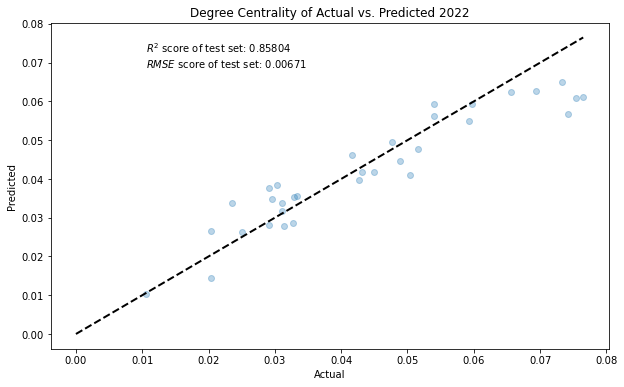

In [37]:
# Plotting the actual vs predicted temperatures for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, label='data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='line of perfect fit')
plt.text(min(y_test), max(y_test)*0.95, f'$R^{2}$ score of test set: {round(test_r2, 5)}')  # Adjust text placement
plt.text(min(y_test), max(y_test)*0.9, f'$RMSE$ score of test set: {round(test_rmse, 5)}')  # Adjust text placement

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Degree Centrality of Actual vs. Predicted 2022')
plt.show()


## Merging predicted degree centrality and actual degree centrality with corresponding airports for comparison

In [38]:
predicted_2022_Degree_centrality = pd.DataFrame(y_pred_test, columns=['predicted Degree Centrality'])

df_2022_node_names = df_with_same_IATA_2018_2022.copy()

df_2022_node_names.drop(['Closeness Centrality_2022','Betweenness Centrality_2022', 'PageRank_2022','Total passengers 2022'], axis=1, inplace=True)


prediction_2022_final = pd.concat([df_2022_node_names, predicted_2022_Degree_centrality], axis=1)


In [39]:
prediction_2022_final

,Node,Degree Centrality_2022,predicted Degree Centrality
0,FRA,0.076504,0.061221
1,CDG,0.075381,0.060829
2,AMS,0.074258,0.056755
3,IST,0.073296,0.064924
4,ATL,0.069447,0.062790
5,ORD,0.065597,0.062334
6,DFW,0.059663,0.059364
7,DXB,0.059342,0.054983
8,DEN,0.054050,0.059215
9,IAH,0.054050,0.056270


## Let's plot out the normalised differences in predicted and actual centralities

In [40]:
from scipy.stats import skew, kurtosis

diff = prediction_2022_final['Degree Centrality_2022'] - prediction_2022_final['predicted Degree Centrality']
diff_norm = diff /prediction_2022_final['Degree Centrality_2022']*100 ## percentage

# Assuming diff_norm is a numpy array or a pandas Series. If it's not, you can convert it as follows:
#diff_norm = np.array(diff_norm)

# Calculate mean and standard deviation
mean_value = np.mean(diff_norm)
std_deviation = np.std(diff_norm)

# Calculate skewness and kurtosis
skewness_value = skew(diff_norm)
kurtosis_value = kurtosis(diff_norm)  # This returns the excess kurtosis

# Print results
print(f"Mean: {mean_value:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")
print(f"Skewness: {skewness_value:.4f}")
print(f"Kurtosis (Excess): {kurtosis_value:.4f}")

Mean: 0.0484
Standard Deviation: 16.0287
Skewness: -0.7154
Kurtosis (Excess): 0.3657


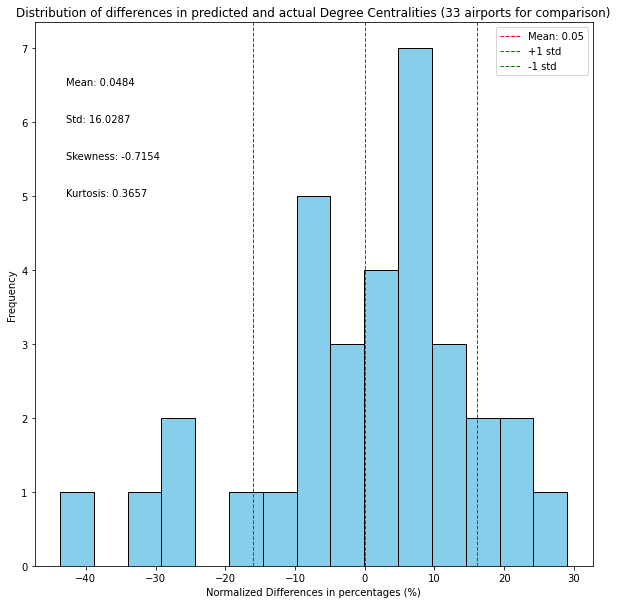

In [41]:
plt.figure(figsize=[10,10])
plt.hist(diff_norm, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of differences in predicted and actual Degree Centralities (33 airports for comparison)')
plt.xlabel('Normalized Differences in percentages (%)')
plt.ylabel('Frequency')
plt.text(-42.8, 6.5, f"Mean: {mean_value:.4f}")  # Adjust text placement
plt.text(-42.8, 6, f"Std: {std_deviation:.4f}")  # Adjust text placement
plt.text(-42.8, 5.5, f"Skewness: {skewness_value:.4f}")  # Adjust text placement
plt.text(-42.8, 5, f"Kurtosis: {kurtosis_value:.4f}")  # Adjust text placement

plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(mean_value + std_deviation, color='g', linestyle='dashed', linewidth=1, label=f'+1 std')
plt.axvline(mean_value - std_deviation, color='g', linestyle='dashed', linewidth=1, label=f'-1 std')
plt.legend()
plt.show()


In [ ]:
G_undirected = G.to_undirected()

partition = community_louvain.best_partition(G_undirected)
# This returns a dictionary with nodes as keys and the corresponding community as values

# Optional: Plot the network with community structure
size = float(len(set(partition.values())))
pos = nx.spring_layout(G_undirected, iterations=50)
count = 0.
for com in set(partition.values()):
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G_undirected, pos, list_nodes, node_size=20,
                           node_color=str(count / size))
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)
plt.show()

im = infomap.Infomap("--two-level")
# Add nodes and edges to the Infomap network
for node in G.nodes:
    im.add_node(node)
for edge in G.edges:
    im.add_link(edge[0], edge[1])

im.run()

# Find communities
for node in im.tree:
    if node.is_leaf:
        print(node.node_id, node.module_id)
        # node_id is the node number, and module_id is the community it belongs to